# QuestionID 2 Gender

In [76]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

In [77]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

## Colors

In [78]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

## Figure Parameters

In [86]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

In [79]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Tech Workers in Tech Companies

## QuestionID: 9
Is your employer primarily a tech company/organization?

In [80]:
df_Answer9 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

In [81]:
df_Answer9.UserID.count()

2888

## QuestionID: 31
Is your primary role within your company related to tech/IT?

In [82]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [83]:
df_Answer13.UserID.count()

1471

In [84]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [85]:
Total_TechinTech = df_TechinTech.UserID.count()
Total_TechinTech

909

# Gender

In [87]:
df_Answer2 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 2", db_survey)

In [88]:
df_Gender = pd.merge(df_TechinTech, df_Answer2 , on='UserID', how='inner')

In [91]:
df_Gender_count = df_Gender.AnswerText.value_counts()
df_Gender_count = pd.DataFrame(df_Gender_count)
df_Gender_count = df_Gender_count.reset_index()

In [93]:
df_Gender_count = df_Gender_count.rename(
    columns={"index": "Gender", "AnswerText": "Count"}
)

In [95]:
df_Gender_count["Gender"] = df_Gender_count["Gender"].replace(
    {"female": "Female", "male": "Male", "MALE": "Male"}
)

In [98]:
df_Gender_count["Gender"] = np.where(
    (df_Gender_count["Gender"] == "Male") | (df_Gender_count["Gender"] == "Female"),
    df_Gender_count["Gender"],
    "Other",
)

In [100]:
df_Gender_count = df_Gender_count.groupby("Gender").sum()
df_Gender_count = df_Gender_count.reset_index()
df_Gender_count

,Gender,Count
0,Female,255
1,Male,605
2,Other,49


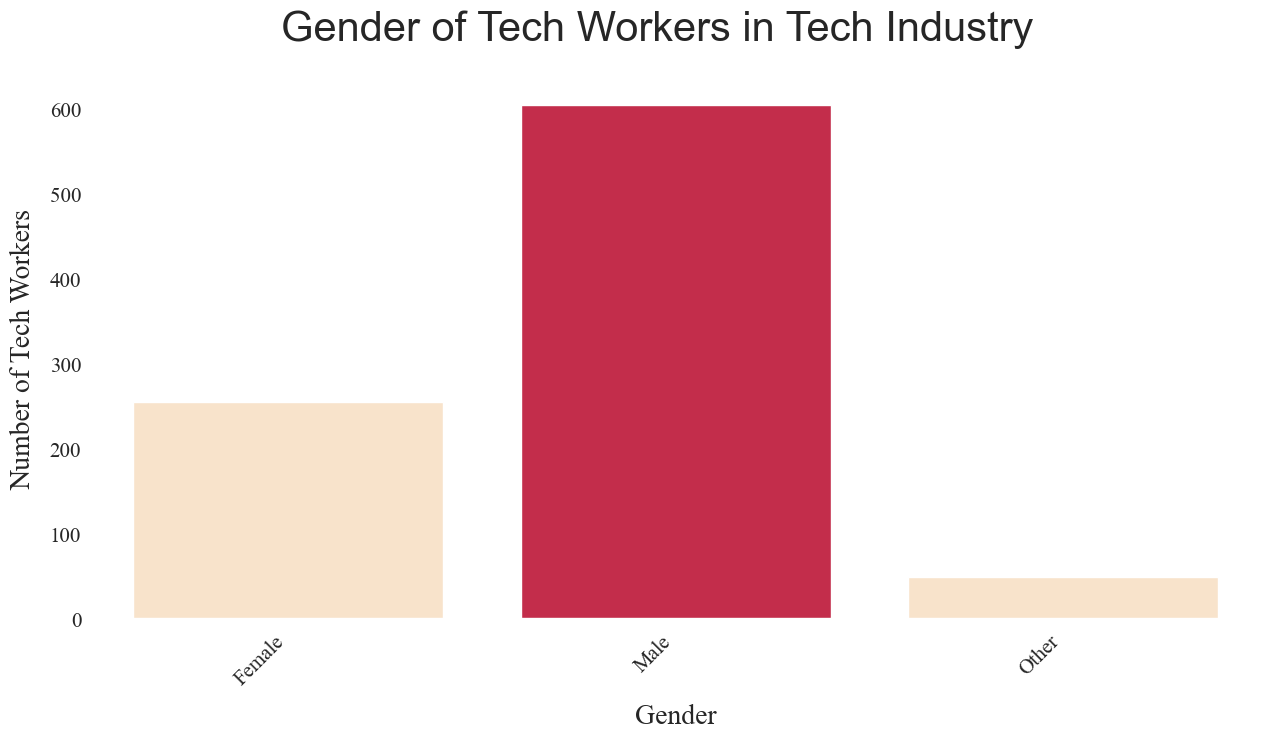

In [101]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Gender",
    y="Count",
    data=df_Gender_count,
    errorbar=None,
    palette=[ord_color if x != "Male" else spec_lev1
        for x in df_Answer2_counts["Gender"]],
)


plt.xlabel("Gender")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Gender of Tech Workers in Tech Industry")

plt.show()